In [41]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import torch
import random

In [42]:
#生成训练数据
num_features = 2
num_examples = 1000
true_w = torch.Tensor([2, -3.4])
true_b = 4.2
inputs = torch.zeros(num_examples, num_features).normal_()#正态分布生成给定shape的输入样本
labels = torch.mm(inputs, true_w.reshape(num_features,1)) + true_b#生成GT的labels
#labels2 = torch.matmul(inputs, true_w) + true_b

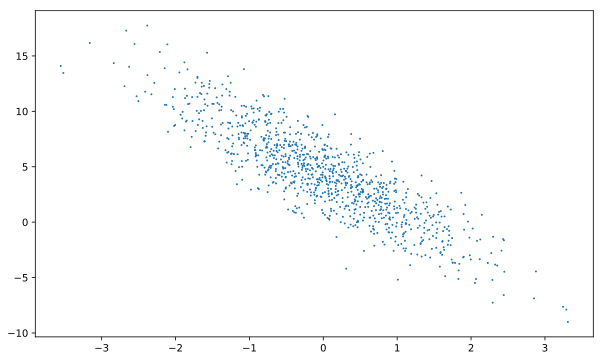

In [45]:
#把训练数据的输入第一维特征与标签画出来，可以看到程负相关，其实就是-3.4
def use_svg_display():
    # Display in vector graphics
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # Set the size of the graph to be plotted
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(inputs[:, 1].numpy(), labels.numpy(), 1);

In [46]:
#读取数据 函数
def data_iter(batch_size, inputs, labels):
    num_examples = len(inputs)
    indices = list(range(num_examples))
    #打乱数据
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        temp_index = torch.LongTensor(indices[i:min(i+batch_size, num_examples)])
        yield inputs[temp_index], labels[temp_index]

In [47]:
#读一组数据 看看
batch_size =10
for X, y in data_iter(batch_size, inputs, labels):
    print(X)
    print(y)
    break

tensor([[-0.4248,  0.1040],
        [ 0.3950,  1.1969],
        [-0.2584,  1.1224],
        [-0.3904,  0.4339],
        [ 0.5377, -0.4634],
        [-1.2244, -0.4575],
        [ 0.8698,  0.8095],
        [-1.5961, -2.1015],
        [-0.1887, -0.9128],
        [-0.7922, -0.6408]])
tensor([[ 2.9968],
        [ 0.9205],
        [-0.1328],
        [ 1.9440],
        [ 6.8510],
        [ 3.3067],
        [ 3.1874],
        [ 8.1529],
        [ 6.9262],
        [ 4.7942]])


In [50]:
#初始化模型参数
w = torch.zeros(num_features, 1).normal_(std=0.01)
b = torch.zeros(1).normal_(std=0.01)
print(w)
print(b)

tensor([[-0.0057],
        [ 0.0124]])
tensor([-8.0548e-05])


In [51]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([-8.0548e-05], requires_grad=True)

In [52]:
#定义模型
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [54]:
#定义损失函数 (1/2)*((y1-y2)**2)
def mseloss(y, label):
    return (y-label)**2 / 2

In [57]:
#拿一个batch的数据测试一下
for X, y in data_iter(batch_size, inputs, labels):
    p = linreg(X, w, b)
    loss = mseloss(p, y)
    print(p)
    print(loss)
    print(loss.mean())
    break

tensor([[-0.0137],
        [-0.0035],
        [ 0.0037],
        [ 0.0094],
        [ 0.0213],
        [-0.0026],
        [ 0.0131],
        [ 0.0120],
        [ 0.0154],
        [-0.0451]], grad_fn=<AddBackward0>)
tensor([[3.6853e+01],
        [1.0896e+01],
        [5.4412e+00],
        [1.3809e+00],
        [1.0036e+00],
        [1.3607e+01],
        [1.3311e-04],
        [5.5392e-01],
        [2.8444e-02],
        [1.5823e+02]], grad_fn=<DivBackward0>)
tensor(22.7996, grad_fn=<MeanBackward0>)


In [63]:
#定义优化器  param=[w,b]
def sgd(params, lr, batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [66]:
#训练
lr = 0.001
num_epochs = 100
net = linreg
loss = mseloss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, inputs, labels):
        p = net(X, w, b)
        l = loss(p, y).mean()
        l.backward()#计算l对参数w，b的梯度，自动保存在 w.grad  b.grad里
        sgd([w, b], lr, batch_size)#根据梯度和学习率更新参数
    with torch.no_grad():#验证模式
        train_l = loss(net(inputs, w, b), labels).mean()
        print("epoch {}, train loss {}".format(epoch+1, train_l.numpy()))

epoch 1, train loss 1.764548659324646
epoch 2, train loss 1.7272647619247437
epoch 3, train loss 1.6907684803009033
epoch 4, train loss 1.6550475358963013
epoch 5, train loss 1.6200796365737915
epoch 6, train loss 1.5858527421951294
epoch 7, train loss 1.5523490905761719
epoch 8, train loss 1.5195544958114624
epoch 9, train loss 1.4874552488327026
epoch 10, train loss 1.456034541130066
epoch 11, train loss 1.4252790212631226
epoch 12, train loss 1.3951740264892578
epoch 13, train loss 1.3657071590423584
epoch 14, train loss 1.3368595838546753
epoch 15, train loss 1.308623194694519
epoch 16, train loss 1.280985713005066
epoch 17, train loss 1.2539323568344116
epoch 18, train loss 1.227449893951416
epoch 19, train loss 1.201529622077942
epoch 20, train loss 1.1761574745178223
epoch 21, train loss 1.151320457458496
epoch 22, train loss 1.1270095109939575
epoch 23, train loss 1.1032142639160156
epoch 24, train loss 1.0799221992492676
epoch 25, train loss 1.0571218729019165
epoch 26, train 

In [80]:
#计算参数差别
print('true_w:{}, trained_w:{}'.format(true_w.numpy(), w.reshape(true_w.shape).data.numpy()))
print('true_b:{}, trained_b:{}'.format(true_b, b.data))

true_w:[ 2.        -3.4000001], trained_w:[ 1.82340288 -3.04271078]
true_b:4.2, trained_b:tensor([3.7062])
